In [176]:
import selenium
from selenium import webdriver
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [126]:
urls_df = pd.read_csv("urls.csv")
title_df = pd.read_csv("all_titles.csv")
print(len(title_df['Titles']))

1253


In [127]:
urls = urls_df["website_url"].tolist()
urls

['https://www.booking.com/index.html?aid=1743217',
 'https://travelsites.com/expedia/',
 'https://travelsites.com/tripadvisor/',
 'https://www.momondo.in/?ispredir=true',
 'https://www.ebookers.com/?AFFCID=EBOOKERS-UK.network.affiliatewindow.85386&awc=7904_1606029543_518c2af76500871f76cadec26f8eb055',
 'https://book.priceline.com/?refid=8431&refclickid=d196c1c3cad4c6e474196ac6815f9652',
 'https://www.trip.com/index?locale=en_us&allianceid=21934&SID=455408&ouid=198c18a52c8911eb811b00ce0a18050d',
 'https://www.orbitz.com/',
 'https://www.travelocity.com/',
 'https://www.hotwire.com/',
 'https://www.otel.com/',
 'https://www.ebookers.com/?AFFCID=EBOOKERS-UK.network.affiliatewindow.85386&awc=7904_1606041576_a3c281bcb3eae0af35b22b076d1074ae',
 'https://www.airbnb.co.in/?locale=en&_set_bev_on_new_domain=1606041642_YjI0OGQ3OWI5MDI2',
 'https://in.lastminute.com/',
 'https://www.onthebeach.co.uk/?Adnetwork=aw&afid=85386&mv_pc=AW&awc=3655_1606041657_3771582e5a1d8da6c1b3321d83f9f0c4&utm_source=A

In [128]:
len(urls)

1253

In [129]:
urls_df

,website_url,Category
0,https://www.booking.com/index.html?aid=1743217,Articles/Blog
1,https://travelsites.com/expedia/,Articles/Blog
2,https://travelsites.com/tripadvisor/,Articles/Blog
3,https://www.momondo.in/?ispredir=true,Articles/Blog
4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,Articles/Blog
...,...,...
1248,https://www.hiremymom.com/,Listings
1249,https://healthecareers.com/,Listings
1250,https://culintro.com/,Listings
1251,https://www.gooverseas.com/teaching-jobs-abroad,Listings


In [130]:
c_df = pd.concat([urls_df, title_df], axis=1, join='inner')
c_df = c_df[['website_url', 'Titles', 'Category']]
display(c_df)

,website_url,Titles,Category
0,https://www.booking.com/index.html?aid=1743217,Booking.com | Official site | The best hotels ...,Articles/Blog
1,https://travelsites.com/expedia/,Expedia & 30+ Hotel Booking Sites Like expedia...,Articles/Blog
2,https://travelsites.com/tripadvisor/,TripAdvisor & 30+ Hotel Booking Sites Like tri...,Articles/Blog
3,https://www.momondo.in/?ispredir=true,Cheap Flights - Search and Compare Flights | m...,Articles/Blog
4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,"Book Travel Deals - Find flights, hotels & ren...",Articles/Blog
...,...,...,...
1248,https://www.hiremymom.com/,Hire My Mom – Legit work from home jobs,Listings
1249,https://healthecareers.com/,Healthcare Jobs & Medical Jobs | Health eCareers,Listings
1250,https://culintro.com/,NaN,Listings
1251,https://www.gooverseas.com/teaching-jobs-abroad,Teaching Jobs Abroad | New Jobs Posted Daily! ...,Listings


In [131]:
#Since I had been told to categorised only E-commerce, Video/Audio websites, Listing websites and Articles/blog websites. 
#Other than that I have added "Other" category which contains site like sports,arts,games,news,Educational, Technical etc. 

c_df['Category'].value_counts()


Others           614
Videos/Photos    275
Articles/Blog    220
E-Commerce       102
Listings          42
Name: Category, dtype: int64

In [132]:
c_df.dropna(subset = ["Titles"], inplace=True)
c_df = c_df.reset_index(drop=True)
c_df

,website_url,Titles,Category
0,https://www.booking.com/index.html?aid=1743217,Booking.com | Official site | The best hotels ...,Articles/Blog
1,https://travelsites.com/expedia/,Expedia & 30+ Hotel Booking Sites Like expedia...,Articles/Blog
2,https://travelsites.com/tripadvisor/,TripAdvisor & 30+ Hotel Booking Sites Like tri...,Articles/Blog
3,https://www.momondo.in/?ispredir=true,Cheap Flights - Search and Compare Flights | m...,Articles/Blog
4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,"Book Travel Deals - Find flights, hotels & ren...",Articles/Blog
...,...,...,...
1198,https://www.jobsinsports.com/,Please Wait... | Cloudflare,Listings
1199,https://www.hiremymom.com/,Hire My Mom – Legit work from home jobs,Listings
1200,https://healthecareers.com/,Healthcare Jobs & Medical Jobs | Health eCareers,Listings
1201,https://www.gooverseas.com/teaching-jobs-abroad,Teaching Jobs Abroad | New Jobs Posted Daily! ...,Listings


In [25]:
#Cleaning Title column before feeding into model
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [133]:
corpus = []
for i in range(len(c_df['Titles'])):
    text = re.sub('[^a-zA-Z]', ' ', str(c_df['Titles'][i]))
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    corpus.append(text)

In [134]:
corpus

['book com offici site best hotel accommod',
 'expedia hotel book site like expedia com',
 'tripadvisor hotel book site like tripadvisor com',
 'cheap flight search compar flight momondo',
 'book travel deal find flight hotel rental car ebook com',
 'welcom travel reserv',
 'trip com offici site travel deal promot',
 'orbitz hotel deal flight cheap vacat rental car',
 'wander wise cheap hotel flight vacat travel deal traveloc',
 'cheap hotel car flight last minut travel deal hotwir',
 'www otel com connect time',
 'book travel deal find flight hotel rental car ebook com',
 'airbnb holiday rental cabin beach hous uniqu home experi',
 'book cheap flight hotel lastminut com',
 'everyth better beach find book cheap holiday deal',
 'search flight hotel rental car kayak',
 'hotel resort book hotel directli marriott bonvoy',
 'home costco travel',
 'last minut hotel deal great hotel hoteltonight',
 'hotel travel club save money hotel flight',
 'ramada hotel book hotel room discount rate deal'

In [135]:
c_df['Cleaned_Texts'] = corpus
c_df = c_df[['website_url', 'Titles', 'Cleaned_Texts','Category']]

In [136]:
c_df

,website_url,Titles,Cleaned_Texts,Category
0,https://www.booking.com/index.html?aid=1743217,Booking.com | Official site | The best hotels ...,book com offici site best hotel accommod,Articles/Blog
1,https://travelsites.com/expedia/,Expedia & 30+ Hotel Booking Sites Like expedia...,expedia hotel book site like expedia com,Articles/Blog
2,https://travelsites.com/tripadvisor/,TripAdvisor & 30+ Hotel Booking Sites Like tri...,tripadvisor hotel book site like tripadvisor com,Articles/Blog
3,https://www.momondo.in/?ispredir=true,Cheap Flights - Search and Compare Flights | m...,cheap flight search compar flight momondo,Articles/Blog
4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,"Book Travel Deals - Find flights, hotels & ren...",book travel deal find flight hotel rental car ...,Articles/Blog
...,...,...,...,...
1198,https://www.jobsinsports.com/,Please Wait... | Cloudflare,pleas wait cloudflar,Listings
1199,https://www.hiremymom.com/,Hire My Mom – Legit work from home jobs,hire mom legit work home job,Listings
1200,https://healthecareers.com/,Healthcare Jobs & Medical Jobs | Health eCareers,healthcar job medic job health ecar,Listings
1201,https://www.gooverseas.com/teaching-jobs-abroad,Teaching Jobs Abroad | New Jobs Posted Daily! ...,teach job abroad new job post daili go oversea,Listings


In [137]:
#creating category ids
c_df['category_id'] = c_df['Category'].factorize()[0]

<ipython-input-137-98ef20fd4437>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['category_id'] = c_df['Category'].factorize()[0]


In [138]:
c_df

,website_url,Titles,Cleaned_Texts,Category,category_id
0,https://www.booking.com/index.html?aid=1743217,Booking.com | Official site | The best hotels ...,book com offici site best hotel accommod,Articles/Blog,0
1,https://travelsites.com/expedia/,Expedia & 30+ Hotel Booking Sites Like expedia...,expedia hotel book site like expedia com,Articles/Blog,0
2,https://travelsites.com/tripadvisor/,TripAdvisor & 30+ Hotel Booking Sites Like tri...,tripadvisor hotel book site like tripadvisor com,Articles/Blog,0
3,https://www.momondo.in/?ispredir=true,Cheap Flights - Search and Compare Flights | m...,cheap flight search compar flight momondo,Articles/Blog,0
4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,"Book Travel Deals - Find flights, hotels & ren...",book travel deal find flight hotel rental car ...,Articles/Blog,0
...,...,...,...,...,...
1198,https://www.jobsinsports.com/,Please Wait... | Cloudflare,pleas wait cloudflar,Listings,3
1199,https://www.hiremymom.com/,Hire My Mom – Legit work from home jobs,hire mom legit work home job,Listings,3
1200,https://healthecareers.com/,Healthcare Jobs & Medical Jobs | Health eCareers,healthcar job medic job health ecar,Listings,3
1201,https://www.gooverseas.com/teaching-jobs-abroad,Teaching Jobs Abroad | New Jobs Posted Daily! ...,teach job abroad new job post daili go oversea,Listings,3


In [139]:
c_df.to_csv("checking.csv", index = False)

In [140]:
#Creating the model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = c_df.iloc[:,-1].values

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state = 100)

In [142]:
len(X_test[0])

1500

In [143]:
y_test

array([1, 2, 4, 0, 2, 2, 0, 4, 1, 2, 2, 0, 1, 1, 0, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 3, 4, 0, 3, 0, 2, 2, 4, 1, 2, 2, 0, 1, 2,
       2, 2, 2, 1, 2, 2, 4, 2, 4, 2, 1, 2, 2, 1, 2, 2, 2, 2, 3, 3, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 1, 2, 2, 1, 2, 2,
       1, 1, 2, 2, 3, 1, 2, 2, 2, 0, 0, 1, 2, 2, 3, 0, 2, 1, 2, 2, 4, 3,
       1, 2, 2, 1, 2, 4, 2, 2, 0, 2, 0, 0, 2, 0, 1, 2, 2, 2, 2, 0, 2, 1,
       2, 0, 0, 1, 2, 2, 2, 0, 1, 2, 4, 2, 1, 0, 0, 3, 2, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 2, 4, 0, 0,
       2, 1, 2, 2, 4, 1, 2, 0, 1, 2, 0, 2, 2, 0, 1, 4, 2, 2, 2, 4, 2, 4,
       0, 4, 2, 1, 0, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 4, 2, 1, 2, 4, 2, 2,
       2, 2, 4, 1, 2, 0, 2, 3, 2, 2, 0, 3, 2, 2, 2, 3, 1, 2, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 0, 2, 2, 4, 2, 0, 4, 2, 2, 2, 0, 0, 0, 2, 1, 2, 0,
       4, 2, 1, 0, 2, 2, 2, 1, 0, 1, 4, 2, 2, 2, 1, 2, 3, 0, 2, 0, 0, 2,
       2, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 4, 2, 2]

In [75]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV

In [150]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    SVC(kernel = 'rbf', random_state =0),
    MultinomialNB(),
    GaussianNB()
]
# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.541463
1,RandomForestClassifier,1,0.536585
2,RandomForestClassifier,2,0.529412
3,RandomForestClassifier,3,0.534314
4,RandomForestClassifier,4,0.553922
5,LinearSVC,0,0.800000
6,LinearSVC,1,0.804878
7,LinearSVC,2,0.813725
8,LinearSVC,3,0.823529
9,LinearSVC,4,0.852941


In [151]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
GaussianNB,0.671296,0.043643
LinearSVC,0.819015,0.020981
MultinomialNB,0.816050,0.023540
RandomForestClassifier,0.539139,0.009332
SVC,0.740703,0.016269


In [152]:
#Using Multinomial Naive Bayes
clf = MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [153]:
y_pred = clf.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [0 0]
 [2 2]
 [4 4]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 0]
 [1 1]
 [2 1]
 [0 0]
 [3 3]
 [1 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [4 4]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 3]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [3 3]
 [0 0]
 [1 1]
 [4 4]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 0]
 [1 1]
 [2 2]
 [1 2]
 [2 2]
 [4 4]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [3 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [0 2]
 [0 0]
 [2 2]
 [2 0]
 [3 3]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [4 4]
 [0 0]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [1 3]
 [1 1]
 [1 2]
 [2 2]
 [2 0]
 [2 2]
 [2 2]
 [2 2]
 [3 3]
 [2 2]
 [2 2]
 [2 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [4 4]
 [1 1]
 [2 2]
 [2 2]
 [2 0]
 [2 1]
 [2 2]
 [2 4]
 [1 1]
 [4 4]
 [1 1]

In [157]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Accuracy is {accuracy_score(y_test, y_pred)*100}%")

[[30  0  6  1  0]
 [ 1 41  3  0  0]
 [ 1  6 68  0  0]
 [ 0  1  1  7  0]
 [ 0  0  3  1 11]]
Accuracy is 86.74033149171271%


<AxesSubplot:>

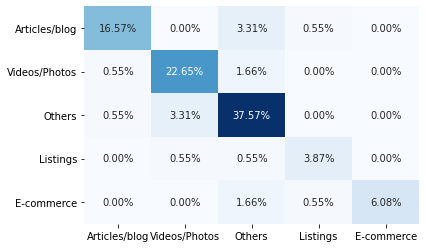

In [169]:
categories = ['Articles/blog', 'Videos/Photos', 'Others', 'Listings', 'E-commerce']
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues',xticklabels= categories , 
            yticklabels=categories,cbar= False)

In [180]:
#Making a single prediction
def single_prediction(url_new):
    PATH = 'C:\Program Files (x86)\chromedriver.exe'
    driver = webdriver.Chrome(PATH)
    try:
        driver.get(url_new)
        title_new = driver.title
        driver.close()
        text = re.sub('[^a-zA-Z]', ' ', str(title_new))
        text = text.lower()
        text = text.split()
        ps = PorterStemmer()
        text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
        text = ' '.join(text)
        text = [text]
        X_new = cv.transform(text).toarray()
        #clf.fit(X_train, y_train)
        y_pred_new = clf.predict(X_new)
        if y_pred_new == 0:
            print('Category is : Articles/Blog')
        elif y_pred_new == 1:
            print('Category is : Videos/Photos')
        elif y_pred_new == 2:
            print('Category is : Others')
        elif y_pred_new == 3:
            print('Category is : Listings')
        else:
            print('Category is : E-Commerce')
    except (selenium.common.exceptions.WebDriverException , NameError , RuntimeError):
        print("Input a correct url.\nIf the url you've given is correct, Please try again !")

In [181]:
url_new = input("Input a url: ")
single_prediction(url_new)

Input a url: https://www.flipkart.com
Category is : E-Commerce
